In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression# create linear regression
from sklearn.model_selection import train_test_split #train test division to see the model accuracy
data = pd.read_csv('USA_Housing.csv')

In [2]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
%matplotlib inline

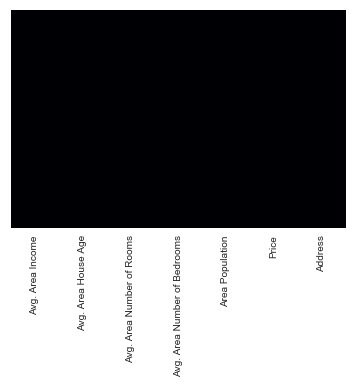

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="magma")

In [13]:
data.duplicated().sum() #check for duplicated
# data.drop_duplicates(inplace=True) for dropping duplicates

0

In [14]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [16]:
data.shape

(5000, 7)

# EXPLORATORY DATA ANALYSIS EDA

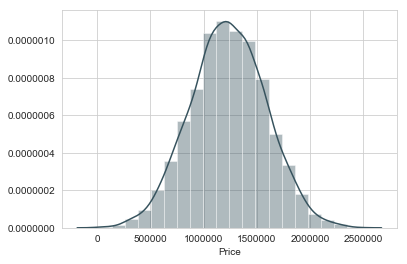

In [19]:
sns.distplot(data['Price'], bins=20)

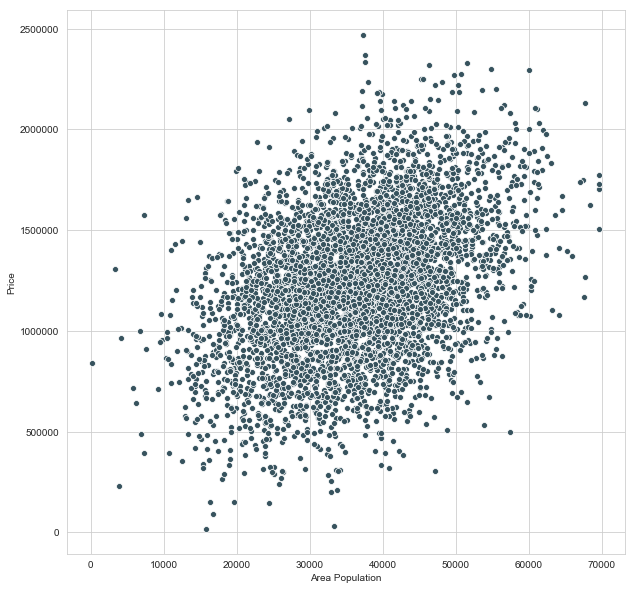

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x="Area Population", y="Price")


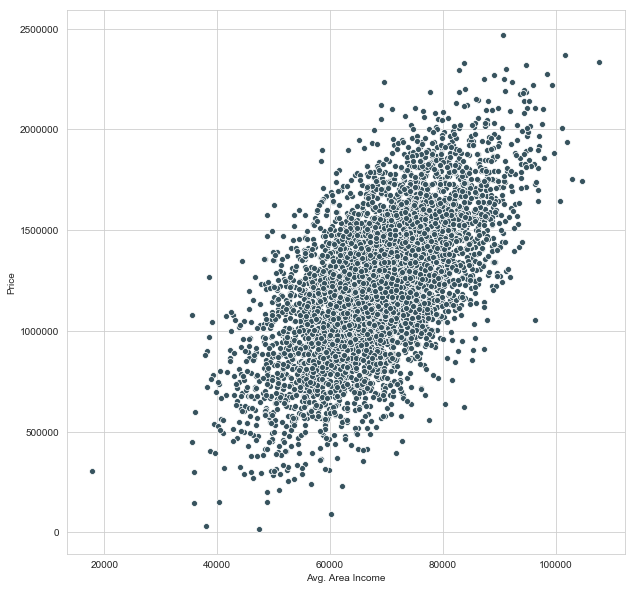

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x="Avg. Area Income", y="Price")


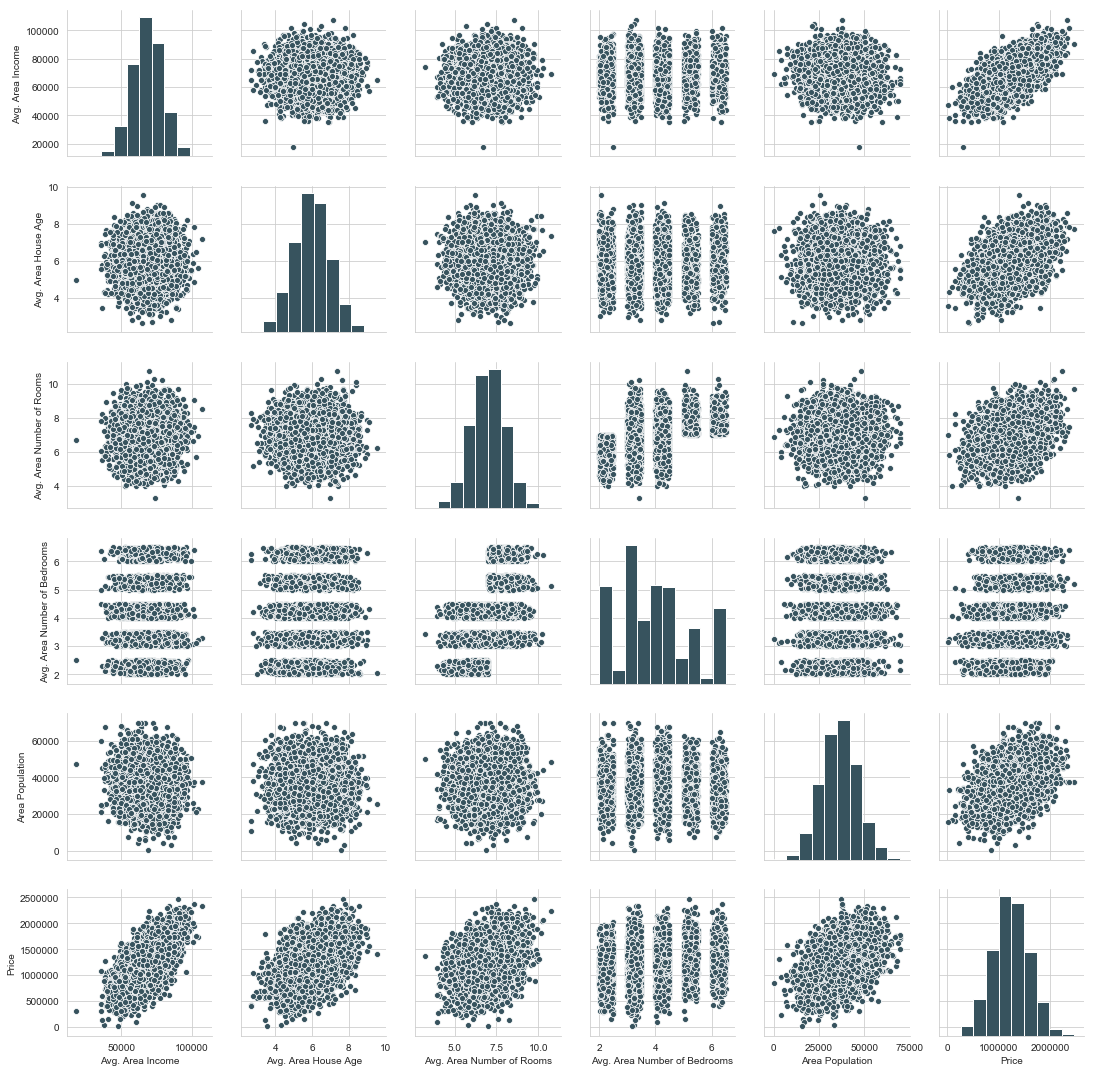

In [26]:
sns.pairplot(data)

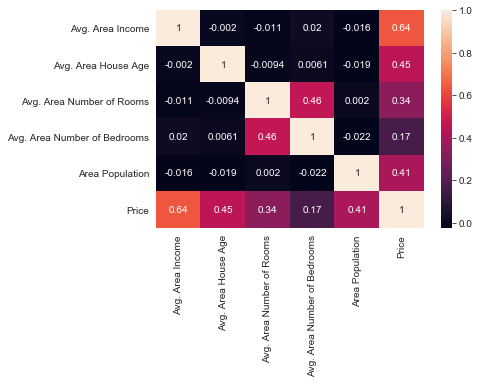

In [27]:
sns.heatmap(data.corr(), annot=True) # correlation for data visuals

In [28]:
data.corr() # show correlation btw data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# modeling

In [29]:
data.drop('Address', axis=1, inplace=True)

In [30]:
X = data.drop('Price', axis=1) #drop price and leave other colums, the independent 
y = data['Price'] #price column only the dependent

In [32]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
5,80175.754159,4.988408,6.104512,4.04,26748.428425
6,64698.463428,6.025336,8.147760,3.41,60828.249085
7,78394.339278,6.989780,6.620478,2.42,36516.358972
8,59927.660813,5.362126,6.393121,2.30,29387.396003
9,81885.927184,4.423672,8.167688,6.10,40149.965749


In [34]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
5       1.068138e+06
6       1.502056e+06
7       1.573937e+06
8       7.988695e+05
9       1.545155e+06
10      1.707046e+06
11      6.637324e+05
12      1.042814e+06
13      1.291332e+06
14      1.402818e+06
15      1.306675e+06
16      1.556787e+06
17      5.284852e+05
18      1.019426e+06
19      1.030591e+06
20      2.146925e+06
21      9.292476e+05
22      7.188872e+05
23      7.439998e+05
24      8.957371e+05
25      1.453975e+06
26      1.125693e+06
27      9.754295e+05
28      1.240764e+06
29      1.577018e+06
            ...     
4970    1.120943e+06
4971    1.111307e+06
4972    1.736402e+06
4973    1.340770e+06
4974    8.013486e+05
4975    1.324382e+06
4976    1.340344e+06
4977    1.518478e+06
4978    1.910585e+06
4979    1.823498e+06
4980    1.406865e+06
4981    1.203850e+06
4982    1.020096e+06
4983    1.194357e+06
4984    1.211900e+06
4985    1.378938e+06
4986    1.260

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=100)# testsize should be 20/30% of the
#dataset

In [37]:
X_train # train the model

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4966,87335.348040,5.507505,8.164426,6.13,39995.842089
4086,77513.925794,5.557758,7.203430,3.40,34958.430387
2881,72920.867754,5.397964,7.736952,3.43,35656.229691
1237,71833.873579,5.876270,4.630230,3.04,31326.338640
1429,76717.371336,5.440850,6.061395,4.45,34944.068605
2530,77825.227469,6.720493,7.425285,5.17,31439.971219
2937,72415.427988,6.271974,7.365504,4.08,28885.053300
283,73839.872417,6.446182,8.274064,4.19,47602.510205
966,66949.001205,5.494535,5.945900,3.18,30323.739883
4847,77112.171202,6.634130,6.296473,2.29,36552.222942


In [38]:
X_test #test the accuracy of the data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
789,62032.959468,5.235211,7.083483,4.39,25267.107607
2507,83896.357966,6.541530,5.258022,4.36,43672.628549
2376,64429.984778,6.436975,7.479371,3.31,39055.822286
1378,57714.752535,4.964760,7.798048,5.40,53100.998908
598,68363.259074,6.306369,6.358629,3.35,20667.902934
1589,64811.171393,6.193441,6.952699,3.46,40549.356805
2580,70221.362015,5.196811,6.993504,3.15,39692.105549
366,65986.817939,4.531778,6.860860,2.15,24056.604466
2320,73101.218640,4.640185,7.385125,6.32,39998.462640
1247,87929.453567,5.521133,5.664880,3.06,44486.383067


In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_test

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
1589    1.153135e+06
2580    1.178272e+06
366     8.218591e+05
2320    1.266947e+06
1247    1.636559e+06
2224    1.085495e+06
3615    9.957832e+05
4176    1.096938e+06
1640    1.702529e+06
1136    1.443027e+06
3437    8.263061e+05
4448    2.115011e+06
1188    1.112286e+06
3332    1.094070e+06
1080    9.053288e+05
1480    7.826561e+05
3954    1.341723e+06
4184    2.119176e+06
4062    1.543966e+06
412     7.172133e+05
4579    1.538040e+06
4979    1.823498e+06
2055    9.645967e+05
4195    1.593332e+06
3383    8.772472e+05
            ...     
3694    1.596440e+06
4730    1.096912e+06
3376    1.004430e+06
973     1.137465e+06
669     1.481941e+06
951     1.378864e+06
1463    8.245409e+05
1491    1.326482e+06
1740    1.517142e+06
1615    4.933500e+05
205     9.608083e+05
1360    1.231452e+06
139     1.721739e+06
305     1.197515e+06
4312    1.483808e+06
1827    9.268809e+05
342     1.123

In [42]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([ 813136.7546944 , 1563236.09165618, 1321396.08341458, ...,
       1463524.93474977,  388153.36825077, 1032634.27163504])

In [45]:
from sklearn.metrics import r2_score# compares the prediction and test

In [46]:
print(r2_score(y_pred, y_test))

0.9113618622601949


In [47]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))